# SGA-PMX Demo

Skrypt przedstawia przykładową implementację algorytmu Simple Genetic Algorithm (SGA) z operatorem PMX i jego zastosowanie do rozwiązywania problemu komiwojażera (ang. Travelling Salesman Problem, TSP). Popularne instancje problemu TSP można znaleźć w bibliotece TSPLib [1]. Skrypt skupia się na rozwiązywaniu instancji BERLIN52, w celu rozwiązywania innych instancji może okazać się konieczna zmiana ustawień parametrów algorytmu, a może też i operatorów ewolucyjnych.

Literatura:

[1] TSPLIB, http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib inline

## Input data

In [2]:
# BERLIN52

n = 52
print('Problem size: %d' % n)

coords = np.array([565.0, 575.0, 25.0, 185.0, 345.0, 750.0, 945.0, 685.0, 845.0, 655.0, 880.0, 660.0, 25.0, 230.0, 525.0, 1000.0, 580.0, 1175.0, 650.0, 1130.0, 1605.0, 620.0, 1220.0, 580.0, 1465.0, 200.0, 1530.0, 5.0, 845.0, 680.0, 725.0, 370.0, 145.0, 665.0, 415.0, 635.0, 510.0, 875.0, 560.0, 365.0, 300.0, 465.0, 520.0, 585.0, 480.0, 415.0, 835.0, 625.0, 975.0, 580.0, 1215.0, 245.0, 1320.0, 315.0, 1250.0, 400.0, 660.0, 180.0, 410.0, 250.0, 420.0, 555.0, 575.0, 665.0, 1150.0, 1160.0, 700.0, 580.0, 685.0, 595.0, 685.0, 610.0, 770.0, 610.0, 795.0, 645.0, 720.0, 635.0, 760.0, 650.0, 475.0, 960.0, 95.0, 260.0, 875.0, 920.0, 700.0, 500.0, 555.0, 815.0, 830.0, 485.0, 1170.0, 65.0, 830.0, 610.0, 605.0, 625.0, 595.0, 360.0, 1340.0, 725.0, 1740.0, 245.0])
coords = coords.reshape(n, 2)

A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
print('Distance matrix:\n', A)

p = [0, 48, 31, 44, 18, 40,  7,  8,  9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24,  3,  5, 14,  4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29,  1,  6, 41, 20, 16,  2, 17, 30, 21]
print('Optimal solution:\n', p)

Problem size: 52
Distance matrix:
 [[   0.          666.10809934  281.11385594 ...  217.08293346
   789.38267019 1220.46097848]
 [ 666.10809934    0.          649.32657423 ...  596.25917184
  1421.55724471 1716.04924172]
 [ 281.11385594  649.32657423    0.         ...  463.24939288
   995.3140208  1483.59361012]
 ...
 [ 217.08293346  596.25917184  463.24939288 ...    0.
   829.60834133 1150.76061803]
 [ 789.38267019 1421.55724471  995.3140208  ...  829.60834133
     0.          624.81997407]
 [1220.46097848 1716.04924172 1483.59361012 ... 1150.76061803
   624.81997407    0.        ]]
Optimal solution:
 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


# Drawing function

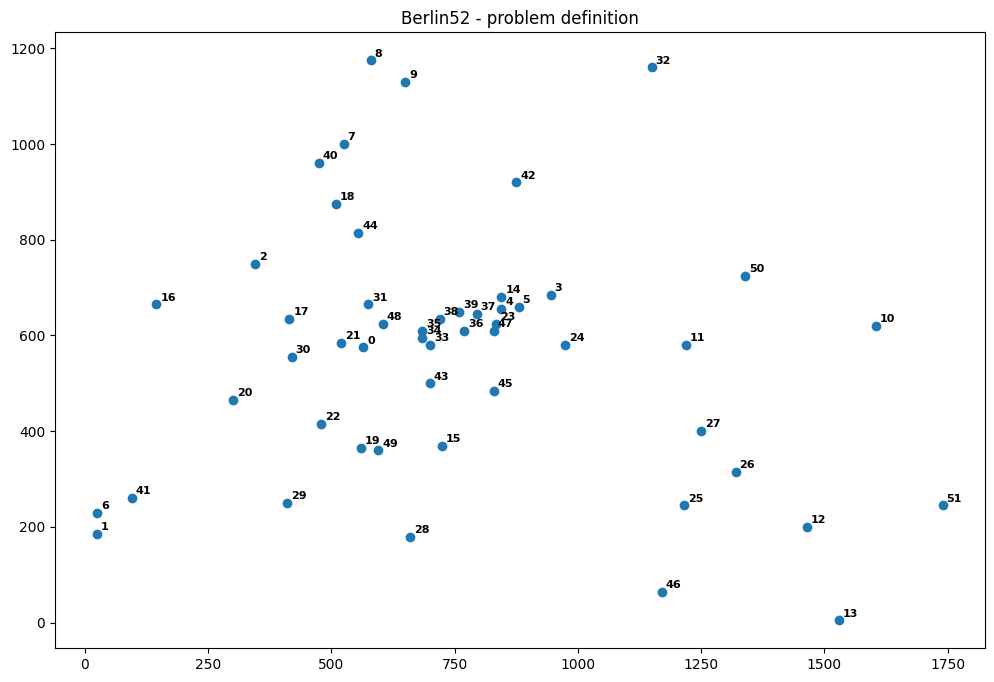

In [3]:
plt.figure(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

plt.title('Berlin52 - problem definition')

plt.show()

In [4]:
from matplotlib.lines import Line2D

#route = best_chromosome
def draw_result(route,coords):
    plt.figure(figsize=(12,8))
    fig, ax = plt.subplots(figsize=(12,8))

    plt.plot(coords[:, 0], coords[:, 1], 'o')

    for i in range(n):
        plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

    ax.add_line(Line2D(
        [coords[0, 0], coords[route[0], 0]],
        [coords[0, 1], coords[route[0], 1]],
        linewidth=1, color='gray'))
    plt.text((coords[0, 0] + coords[route[0], 0])/2 + 6,
            (coords[0, 1] + coords[route[0], 1])/2 + 6,
            '%d' % A[0, route[0]], fontdict={'weight':'normal', 'size':7})
    for i in range(1, len(route)):
        ax.add_line(Line2D(
            [coords[route[i-1], 0], coords[route[i], 0]],
            [coords[route[i-1], 1], coords[route[i], 1]],
            linewidth=1, color='gray'))
        plt.text((coords[route[i-1], 0] + coords[route[i], 0])/2 + 6,
                (coords[route[i-1], 1] + coords[route[i], 1])/2 + 6,
                '%d' % A[route[i-1], route[i]], fontdict={'weight':'normal', 'size':7})
    ax.add_line(Line2D(
        [coords[route[-1], 0], coords[0, 0]],
        [coords[route[-1], 1], coords[0, 1]],
        linewidth=1, color='gray'))
    plt.text((coords[route[-1], 0] + coords[0, 0])/2 + 6,
            (coords[route[-1], 1] + coords[0, 1])/2 + 6,
            '%d' % A[route[-1], 0], fontdict={'weight':'normal', 'size':7})

    plt.title('Berlin52 - pmx solution')

    plt.show()

<Figure size 1200x800 with 0 Axes>

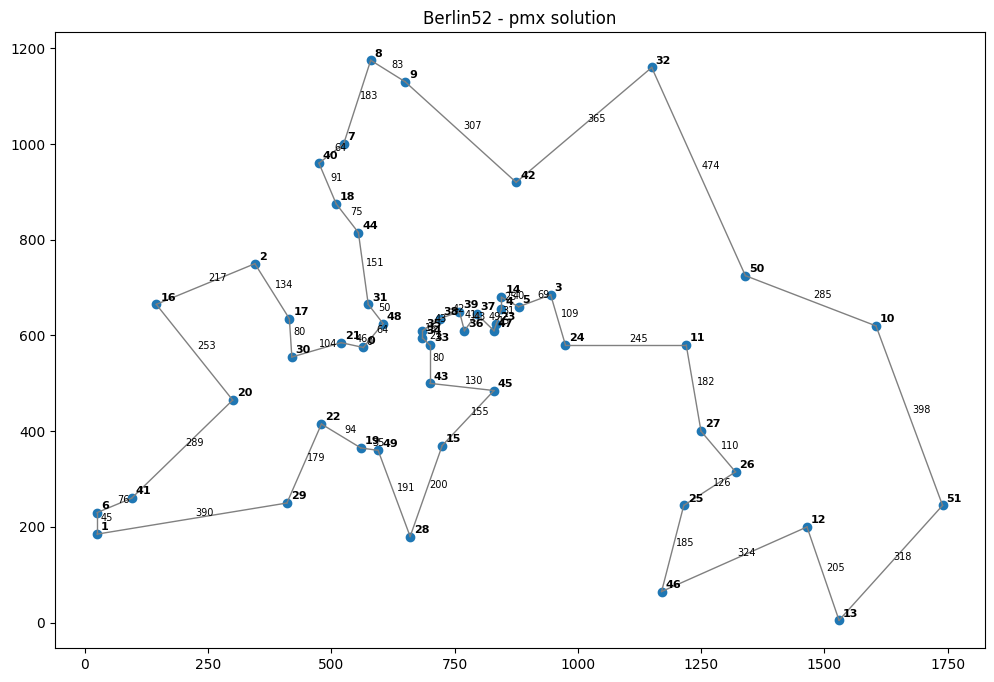

In [5]:
draw_result(p,coords)

## Objective function

In [6]:
def tsp_objective_function(p):
    s = 0.0
    for i in range(n):
        s += A[p[i-1], p[i]]
    return s

In [7]:
print(tsp_objective_function(p), p)

7544.365901904086 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


## Random Sampling

In [8]:
t0 = time.time()

T = 1000000

permutations = np.empty((T, n), dtype=np.int64)
costs = np.zeros(T)
for i in range(T):
    permutations[i, :] = np.random.permutation(n)
    costs[i] = tsp_objective_function(permutations[i, :])

print(time.time() - t0)

p = permutations[costs.argmin(), :]
print(tsp_objective_function(p), p)

27.21252202987671
21547.31417564973 [49  2 40 32 14 33 23  5 19 45 24 30 17 18  7 42  4 16 21 27 13 25 11  3
  9 22  6 41 26 29 31 34 48  0 35 37 20 43 36 44  8  1 12 10 51 46 38 47
 50 39 15 28]


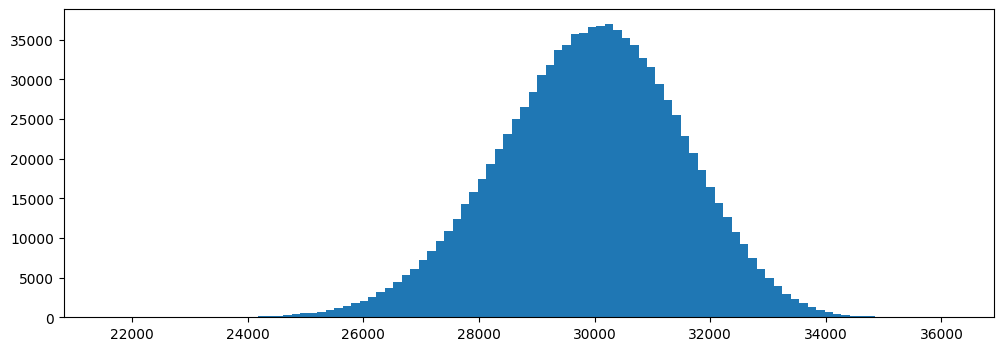

29914.31777152728 1578.755508301752


In [9]:
plt.figure(figsize=(12,4))
plt.hist(costs, bins=100)
plt.show()

print(costs.mean(), costs.std())

## Simulated Annealing

In [10]:
def random_neighbor(p, radius):
    q = p.copy()
    for r in range(radius):
        i, j = np.random.choice(n, 2, replace=False)
        q[i], q[j] = q[j], q[i]
    return q

In [11]:
T = 500000
radius = 1
alpha = 1.0

t0 = time.time()

p = np.random.permutation(n)
p_cost = tsp_objective_function(p)
costs = np.zeros(T)
for t in range(T):
    q = random_neighbor(p, radius)
    q_cost = tsp_objective_function(q)
    if(q_cost < p_cost):
        p, p_cost = q, q_cost
    elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
        p, p_cost = q, q_cost
    costs[t] = p_cost

print(time.time() - t0, costs.min())

25.388805627822876 9181.392812819693


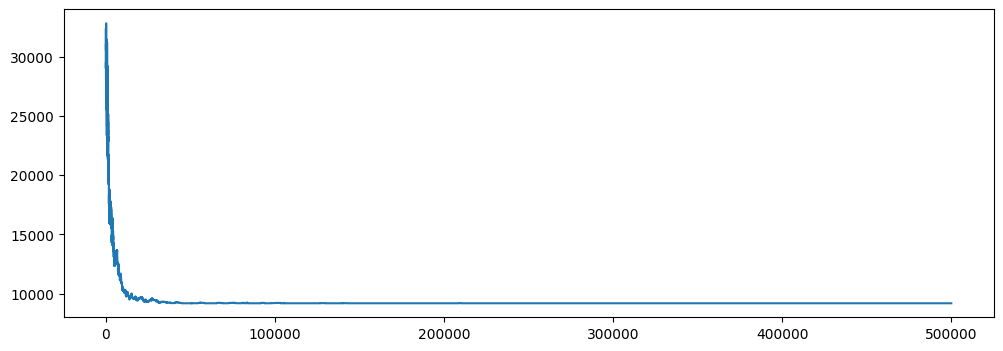

In [12]:
plt.figure(figsize=(12,4))
plt.plot(costs)
plt.show()

## SGA-PMX

In [13]:
def PMX(ind1, ind2):
    gene=np.random.randint(1,len(ind1),2)
    start=min(gene)-1
    end=max(gene)

    child1=ind1.copy()
    child2=ind2.copy()
    #inverse permutation
    ordering1=np.argsort(ind1)
    ordering2=np.argsort(ind2)

    for index in range(start,end):

        found1=ordering1[ind2[index]]
        found2=ordering2[ind1[index]]
        #swap the value at index with the value of the other parent at index (found in oneself)
        child2[index],child2[found2]=child2[found2],child2[index]
        child1[index],child1[found1]=child1[found1],child1[index]
        #update the positions of elements
        ordering1[child1[index]],ordering1[child1[found1]]=ordering1[child1[found1]],ordering1[child1[index]]
        ordering2[child2[index]],ordering2[child2[found2]]=ordering2[child2[found2]],ordering2[child2[index]]
        #print(ordering1[child1[index]],ordering1[child1[ordering1[ind2[index]]]])
        #print(ordering1)
    return child1,child2

In [14]:
#def local_search_mutation(p,k):


In [15]:
def random_transpose_mutation(p):
    a = np.random.choice(len(p), 2, False)
    q=p.copy()
    q[a[0]],q[a[1]]=q[a[1]],q[a[0]]
    return q

In [16]:
def reverse_sequence_mutation(p):
    a = np.random.choice(len(p), 2, False)
    i, j = a.min(), a.max()
    q = p.copy()
    q[i:j+1] = q[i:j+1][::-1]
    return q

# SGA class

In [29]:
class SGA:
    def __init__(self,chromosome_length,mutation_function,crossover_function,population_size=500,crossover_probability=0.95,mutation_probability=0.25,number_of_iterations=250):
        self.population_size = population_size
        self.chromosome_length = chromosome_length
        self.number_of_offspring = population_size
        self.crossover_probability = crossover_probability
        self.mutation_probability = mutation_probability
        self.number_of_iterations = number_of_iterations
        self.mutation_function=mutation_function
        self.crossover_function=crossover_function

        self.time0 = time.time()
        self.best_objective_value = np.Inf
        self.best_chromosome = np.zeros((1, chromosome_length))
        self.values=np.zeros(number_of_iterations)
    def gen_initial_population(self):
        # generating an initial population
        self.current_population = np.zeros((self.population_size, self.chromosome_length), dtype=np.int64)
        for i in range(self.population_size):
            self.current_population[i, :] = np.random.permutation(self.chromosome_length)

        # evaluating the objective function on the current population
        self.objective_values = np.zeros(self.population_size)
        for i in range(self.population_size):
            self.objective_values[i] = tsp_objective_function(self.current_population[i, :])
    
    def fit(self):
        for t in range(self.number_of_iterations):

            # selecting the parent indices by the roulette wheel method
            fitness_values = self.objective_values.max() - self.objective_values
            if fitness_values.sum() > 0:
                fitness_values = fitness_values / fitness_values.sum()
            else:
                fitness_values = np.ones(self.population_size) / self.population_size
            parent_indices = np.random.choice(self.population_size, self.number_of_offspring, True, fitness_values).astype(np.int64)

            # creating the children population
            children_population = np.zeros((self.number_of_offspring, self.chromosome_length), dtype=np.int64)
            for i in range(int(self.number_of_offspring/2)):
                if np.random.random() < self.crossover_probability:
                    #I'm changing the copying behaviour since it isn't in place anyway, i will just create new ndarrays in the function
                    children_population[2*i, :], children_population[2*i+1, :] = self.crossover_function(self.current_population[parent_indices[2*i], :], self.current_population[parent_indices[2*i+1], :])
                else:
                    children_population[2*i, :], children_population[2*i+1, :] = self.current_population[parent_indices[2*i], :].copy(), self.current_population[parent_indices[2*i+1]].copy()
                
            if np.mod(self.number_of_offspring, 2) == 1:
                children_population[-1, :] = self.current_population[parent_indices[-1], :]
            # mutating the children population
            for i in range(self.number_of_offspring):
                if np.random.random() < self.mutation_probability:
                    children_population[i, :] = self.mutation_function(children_population[i, :])
            # evaluating the objective function on the children population
            children_objective_values = np.zeros(self.number_of_offspring)
            for i in range(self.number_of_offspring):
                children_objective_values[i] = tsp_objective_function(children_population[i, :])
            # replacing the current population by (Mu + Lambda) Replacement
            objective_values = np.hstack([self.objective_values, children_objective_values])
            current_population = np.vstack([self.current_population, children_population])

            I = np.argsort(objective_values)
            self.current_population = current_population[I[:self.population_size], :]
            self.objective_values = objective_values[I[:self.population_size]]
            # recording some statistics - the mistake was here!
            if self.best_objective_value > self.objective_values[0]:
                self.best_objective_value = self.objective_values[0]
                self.best_chromosome = self.current_population[0, :]
            # est value in generation
            self.values[t]=self.objective_values[0]
            #print('%3d %14.8f %12.8f %12.8f %12.8f %12.8f' % (t, time.time() - self.time0, self.objective_values.min(), self.objective_values.mean(), self.objective_values.max(), self.objective_values.std()))


# SGA experiments

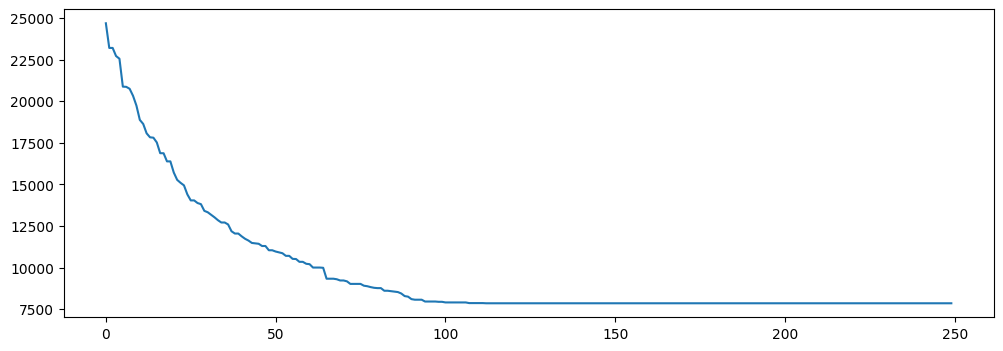

In [34]:
population_size = 500
chromosome_length = n
number_of_offspring = population_size
crossover_probability = 0.95
mutation_probability = 0.25
number_of_iterations = 250
#default config
E1=SGA(chromosome_length=n,mutation_function=reverse_sequence_mutation,crossover_function=PMX)
E1.gen_initial_population()
E1.fit()
plt.figure(figsize=(12,4))
plt.plot(E1.values)
plt.show()

<Figure size 1200x800 with 0 Axes>

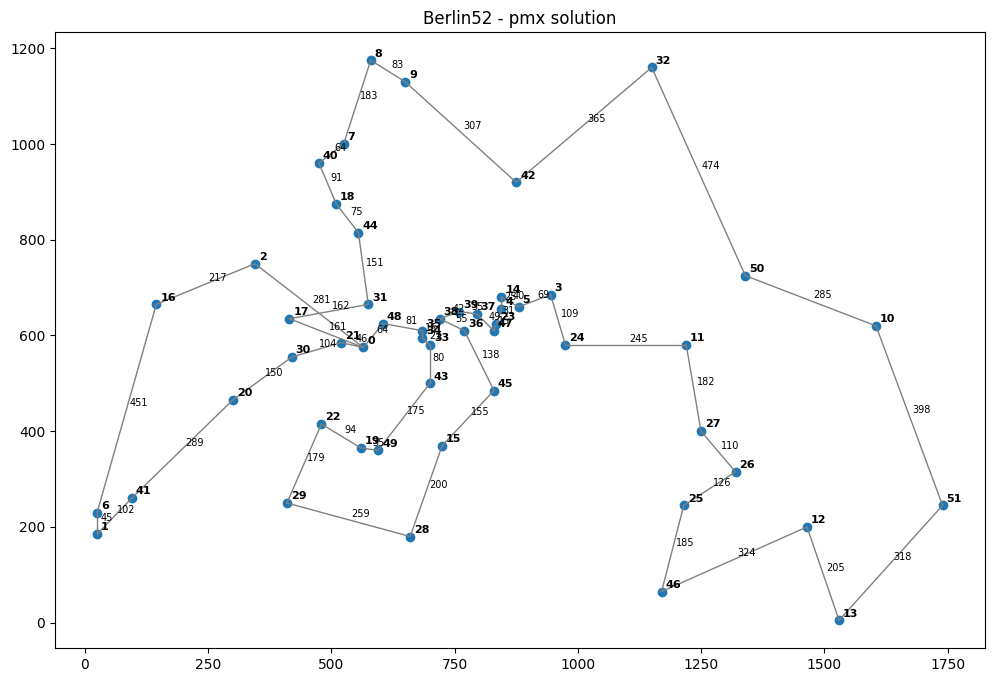

In [35]:
draw_result(E1.best_chromosome,coords)

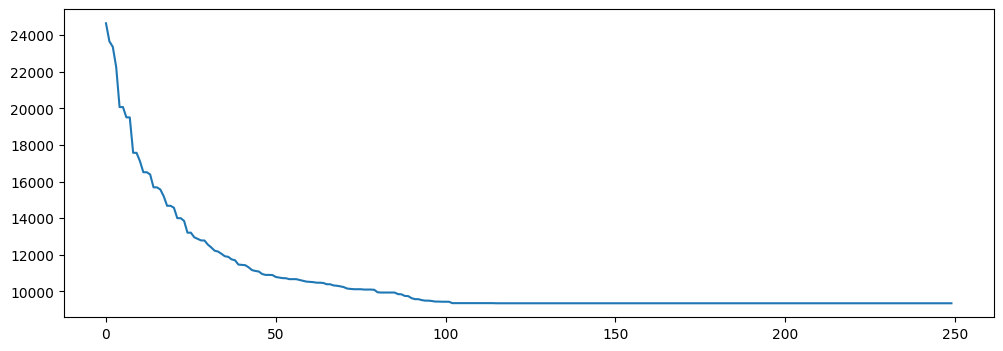

In [ ]:
#transpose mutation
E2=SGA(chromosome_length=n,mutation_function=random_transpose_mutation,crossover_function=PMX)
E2.gen_initial_population()
E2.fit()
plt.figure(figsize=(12,4))
plt.plot(E2.values)
plt.show()

<Figure size 1200x800 with 0 Axes>

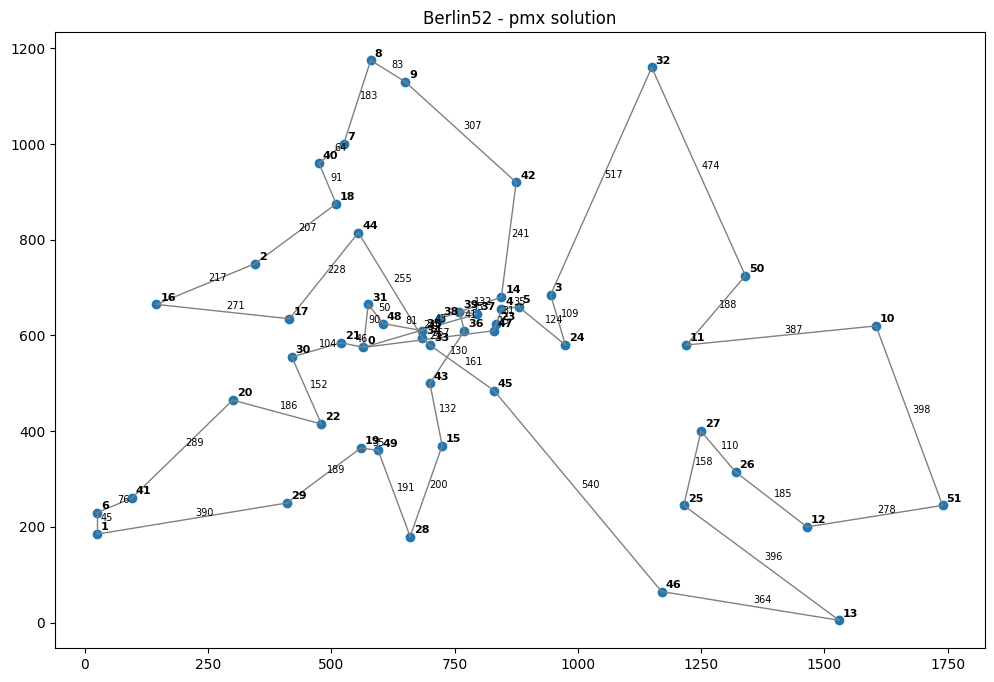

In [33]:
draw_result(E2.best_chromosome,coords)

# Old cells

In [ ]:
population_size = 500
chromosome_length = n
number_of_offspring = population_size
crossover_probability = 0.95
mutation_probability = 0.25
number_of_iterations = 250

time0 = time.time()

best_objective_value = np.Inf
best_chromosome_trans = np.zeros((1, chromosome_length))
values_trans=np.zeros(number_of_iterations)

# generating an initial population
current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
for i in range(population_size):
    current_population[i, :] = np.random.permutation(chromosome_length)

# evaluating the objective function on the current population
objective_values = np.zeros(population_size)
for i in range(population_size):
    objective_values[i] = tsp_objective_function(current_population[i, :])

for t in range(number_of_iterations):

    # selecting the parent indices by the roulette wheel method
    fitness_values = objective_values.max() - objective_values
    if fitness_values.sum() > 0:
        fitness_values = fitness_values / fitness_values.sum()
    else:
        fitness_values = np.ones(population_size) / population_size
    parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)

    # creating the children population
    children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
    for i in range(int(number_of_offspring/2)):
        if np.random.random() < crossover_probability:
            #I'm changing the copying behaviour since it isn't in place anyway, i will just create new ndarrays in the function
            children_population[2*i, :], children_population[2*i+1, :] = PMX(current_population[parent_indices[2*i], :], current_population[parent_indices[2*i+1], :])
        else:
            children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
        # seen = np.zeros(len(children_population[2*i, :]), dtype=bool)
        # seen[children_population[2*i, :]] = True
        # is_permutation = np.all(seen)
        # # #checking if this maintains permutiations
        # # print(children_population[2*i, :])
        # # print(is_permutation)
        

    if np.mod(number_of_offspring, 2) == 1:
        children_population[-1, :] = current_population[parent_indices[-1], :]

    # mutating the children population
    for i in range(number_of_offspring):
        if np.random.random() < mutation_probability:
            children_population[i, :] = random_transpose_mutation(children_population[i, :])

    # evaluating the objective function on the children population
    children_objective_values = np.zeros(number_of_offspring)
    for i in range(number_of_offspring):
        children_objective_values[i] = tsp_objective_function(children_population[i, :])

    # replacing the current population by (Mu + Lambda) Replacement
    objective_values = np.hstack([objective_values, children_objective_values])
    current_population = np.vstack([current_population, children_population])

    I = np.argsort(objective_values)
    current_population = current_population[I[:population_size], :]
    objective_values = objective_values[I[:population_size]]

    # recording some statistics - the mistake was here!
    if best_objective_value > objective_values[0]:
        best_objective_value = objective_values[0]
        #czemu tu się zeruje??
        best_chromosome_trans = current_population[0, :]
        #print(best_chromosome)
    # est value in generation
    values_trans[t]=objective_values[0]
    print('%3d %14.8f %12.8f %12.8f %12.8f %12.8f' % (t, time.time() - time0, objective_values.min(), objective_values.mean(), objective_values.max(), objective_values.std()))

  0     0.05521417 23757.75680768 28400.04791432 29790.11065647 1079.72868923
  1     0.08631754 23757.75680768 27256.97421474 28408.93426969 923.17880887
  2     0.11430788 22477.35862455 26333.96847841 27405.33306130 909.72879929
  3     0.14168859 22477.35862455 25530.85391567 26588.37224031 848.98202118
  4     0.16945648 22335.54704194 24889.90592995 25847.51416085 774.70529982
  5     0.19799113 21590.04820240 24325.32183896 25233.89880022 720.81429455
  6     0.22856474 21552.83848093 23823.62305267 24656.49265216 675.31588154
  7     0.26519513 21365.84887981 23327.12805278 24151.78782001 649.26516836
  8     0.30530715 20477.87069734 22824.24090851 23617.49616108 601.10606870
  9     0.34251976 20052.00372521 22383.04516775 23111.76930937 549.50964324
 10     0.37729788 20052.00372521 21995.04505508 22669.69701421 526.58207391
 11     0.40643287 19035.60252623 21618.56348266 22279.15240596 531.92362369
 12     0.43565845 18573.71934283 21231.16282278 21902.49632685 543.4706026

In [ ]:
population_size = 500
chromosome_length = n
number_of_offspring = population_size
crossover_probability = 0.95
mutation_probability = 0.25
number_of_iterations = 250

time0 = time.time()

best_objective_value = np.Inf
best_chromosome = np.zeros((1, chromosome_length))
values=np.zeros(number_of_iterations)

# generating an initial population
current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
for i in range(population_size):
    current_population[i, :] = np.random.permutation(chromosome_length)

# evaluating the objective function on the current population
objective_values = np.zeros(population_size)
for i in range(population_size):
    objective_values[i] = tsp_objective_function(current_population[i, :])

for t in range(number_of_iterations):

    # selecting the parent indices by the roulette wheel method
    fitness_values = objective_values.max() - objective_values
    if fitness_values.sum() > 0:
        fitness_values = fitness_values / fitness_values.sum()
    else:
        fitness_values = np.ones(population_size) / population_size
    parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)

    # creating the children population
    children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
    for i in range(int(number_of_offspring/2)):
        if np.random.random() < crossover_probability:
            #I'm changing the copying behaviour since it isn't in place anyway, i will just create new ndarrays in the function
            children_population[2*i, :], children_population[2*i+1, :] = PMX(current_population[parent_indices[2*i], :], current_population[parent_indices[2*i+1], :])
        else:
            children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
        seen = np.zeros(len(children_population[2*i, :]), dtype=bool)
        seen[children_population[2*i, :]] = True
        is_permutation = np.all(seen)
        # #checking if this maintains permutiations
        # print(children_population[2*i, :])
        # print(is_permutation)
        

    if np.mod(number_of_offspring, 2) == 1:
        children_population[-1, :] = current_population[parent_indices[-1], :]

    # mutating the children population
    for i in range(number_of_offspring):
        if np.random.random() < mutation_probability:
            children_population[i, :] = reverse_sequence_mutation(children_population[i, :])

    # evaluating the objective function on the children population
    children_objective_values = np.zeros(number_of_offspring)
    for i in range(number_of_offspring):
        children_objective_values[i] = tsp_objective_function(children_population[i, :])

    # replacing the current population by (Mu + Lambda) Replacement
    # print(current_population.shape)
    # print(children_population.shape)
    objective_values = np.hstack([objective_values, children_objective_values])
    current_population = np.vstack([current_population, children_population])
    #shape sanity check
    # print('######################')
    # print(objective_values.shape)
    # print(current_population.shape)
    # print('#################')
    I = np.argsort(objective_values)
    current_population = current_population[I[:population_size], :]
    objective_values = objective_values[I[:population_size]]
    #print(current_population)
    # recording some statistics - thr mistake was here!
    if best_objective_value > objective_values[0]:
        best_objective_value = objective_values[0]
        #czemu tu się zeruje??
        best_chromosome = current_population[0, :]
        print(best_chromosome)
    # est value in generation
    values[t]=objective_values[0]
    #print('%3d %14.8f %12.8f %12.8f %12.8f %12.8f' % (t, time.time() - time0, objective_values.min(), objective_values.mean(), objective_values.max(), objective_values.std()))

[49 21 30 43  4 14  5 27 46 37 48  7 31 33 39 12 51 10  0 40 17 34 22 45
  6 18 44 50 38 11 35 32 29  1 16 19 23 47  9 13 28  3 36 15 41 20  2 24
 42  8 26 25]
[49 21 30 35  4 14  5 27 46 37 48 11 47 33 39 12 51 13 32 40 28  1 22 45
  6 18 23  9 10  7 43  0 38 34 29 15 44 31 50  3 17 16  2 19 41 20 36 24
 42  8 26 25]
[14 47 36  3 44 42 33 30 43  5  2 18 48 38 50 35  4 45 17  6 41 31 15 23
  1 20 16 49 22 37  9 40 19 26 13 25 11 27 39 32 10 29  0  8 21 24 51 12
 46 28  7 34]
[14 50 36  3 38 43 40 34  1 21 30  6 41 44 47 35  4 45 17 18 48 31 15 23
  5 20 16 49 22 37  8  0 19 26 13 25 11 27 39 32 10 29 33  9 42 24 51 12
 46 28  7  2]
[42 46 21  4 39 33 19 26 34 45 48  0 47 37 25 12 51 10 27 13 30 23  5 50
 36 11 40 28 49 20 41 16 17 15 14  1  6  2 22 29  3 35 38  9  8 44  7 18
 43 24 32 31]
[14 47 36  3 44 42 33  0 43  5  2 18  8 10 50 23 15 31 41  6 17 45  4 35
  1 20 16 49 22 37  9 40 19 26 13 25 11 27 39 32 38 29 30 48 21 24 51 12
 46 28  7 34]
[14 47 43 33 44 42  3 34  7  5  2 18  8 

<Figure size 1200x800 with 0 Axes>

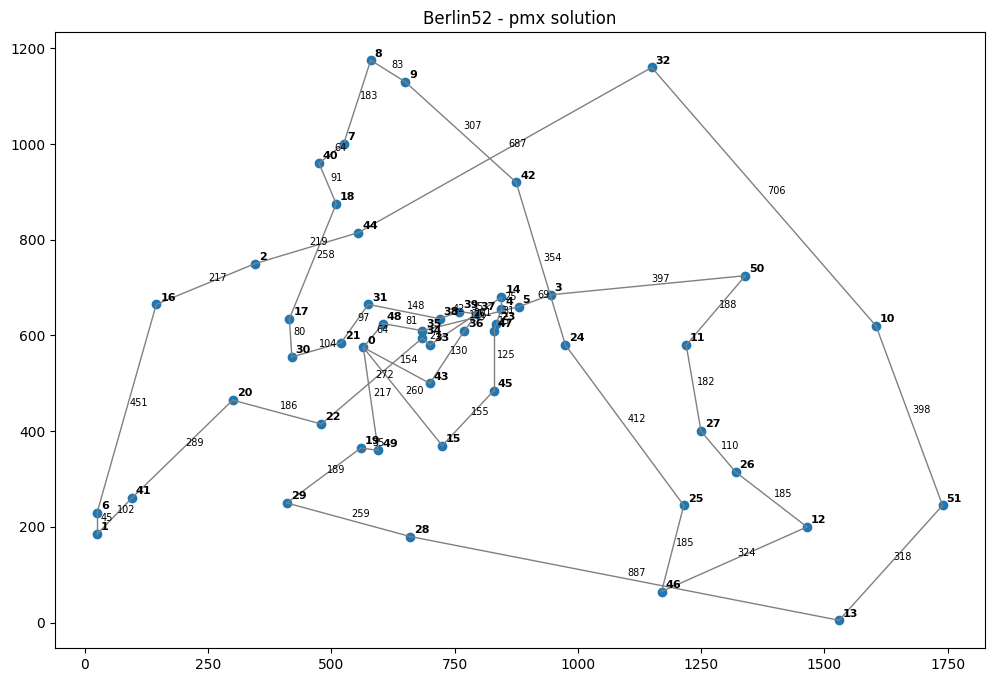

In [ ]:
from matplotlib.lines import Line2D

route = best_chromosome_trans

plt.figure(figsize=(12,8))
fig, ax = plt.subplots(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

ax.add_line(Line2D(
    [coords[0, 0], coords[route[0], 0]],
    [coords[0, 1], coords[route[0], 1]],
    linewidth=1, color='gray'))
plt.text((coords[0, 0] + coords[route[0], 0])/2 + 6,
         (coords[0, 1] + coords[route[0], 1])/2 + 6,
         '%d' % A[0, route[0]], fontdict={'weight':'normal', 'size':7})
for i in range(1, len(route)):
    ax.add_line(Line2D(
        [coords[route[i-1], 0], coords[route[i], 0]],
        [coords[route[i-1], 1], coords[route[i], 1]],
        linewidth=1, color='gray'))
    plt.text((coords[route[i-1], 0] + coords[route[i], 0])/2 + 6,
             (coords[route[i-1], 1] + coords[route[i], 1])/2 + 6,
             '%d' % A[route[i-1], route[i]], fontdict={'weight':'normal', 'size':7})
ax.add_line(Line2D(
    [coords[route[-1], 0], coords[0, 0]],
    [coords[route[-1], 1], coords[0, 1]],
    linewidth=1, color='gray'))
plt.text((coords[route[-1], 0] + coords[0, 0])/2 + 6,
         (coords[route[-1], 1] + coords[0, 1])/2 + 6,
         '%d' % A[route[-1], 0], fontdict={'weight':'normal', 'size':7})

plt.title('Berlin52 - pmx + transpose solution')

plt.show()